# Training a Machine Learning model (Random Forest)

# Cài đặt thư viện cần thiết

In [3]:
from matplotlib import pyplot
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import time

# Tìm hiểu data
## Input

* Đầu vào nhóm sẽ dùng dataset https://www.kaggle.com/datasets/ypzhangsam/sonaralldata

## Ouput
* Là model sau khi được train

In [4]:
data = read_csv('/content/sonar.all-data.csv')
dataset = data.values
data

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


#Giới thiệu về Ensemble Learning
* Giả sử chúng ta có một bài toán phân loại sản phẩm sử dụng ML. Team của bạn chia thành 3 nhóm, mỗi nhóm sử dụng một thuật toán khác nhau để train model trên tập train set. Sau đó đánh giá độ chính xác trên tập validation set:

* Nhóm 1: Sử dụng thuật toán Linear Regression.
* Nhóm 2: Sử dụng thuật toán k-Nearest Neighbour.
* Nhóm 3: Sử dụng thuật toán Decision Tree.
* Độ chính xác của mỗi nhóm lần lượt là 70%, 67% và 76%. Điều này hoàn toàn dễ hiểu bởi vì 3 models làm việc theo những các khác nhau. 
* Ví dụ, Linear Regression cố gắng tìm ra mối quan hệ tuyến tính giữa các điểm dữ liệu, trong khi Decision Tree thì lại dựa vào mỗi quan hệ phi tuyến để liên kết dữ liệu.
* Có cách nào kết hợp kết quả cả 3 models để tạo ra kết quả cuối cùng hay không?

#Basic Ensemble Techniques
 * Max Voting
 * Averaging
 * Weighted Averaging

## Max Voting
  * Kỹ thuật này hay được sử dụng cho bài toán phân lớp, ở đó, nhiều models được sử dụng để dự đoán cho mỗi mẫu dữ liệu. Kết quả dự đoán của mỗi model được xem như là một vote. Cái nào có số vote cao nhất thì sẽ là kết quả dự đoán cuối cùng.


##Averaging
* Tương tự như kỹ thuật Voting, Averaging cũng sử dụng kết quả dự đoán của nhiều models. Tuy nhiên, ở bước quyết định kết quả cuối cùng, giá trị trung bình của tất cả kêt quả của các models được lựa chọn.

##Weighted Average
* Đây là kỹ thuật mở rộng của averaging. Mỗi model được gắn kèm với một trọng số tỷ lệ với mức độ quan trọng của model đó. Kết quả cuối cùng là trung bình có trọng số của tất cả kết quả của các models.

#Advanced Ensemble techniques
* Có 4 kỹ thuật của Ensemble Learning được xếp vào nhóm advanced:

* Stacking
* Blending
* Bagging
* Boosting

##Stacking


* Bước 1: Train model A (base model) theo kiểu cross-validation với k=10.
* Bước 2: Tiếp tuc train model A trên toàn bộ train set.
* Bước 3: Sử dụng model A để dự đoán trên test set.
Bước 4: Lặp lại bước 1,2,3 cho các base model khác.
* Bước 5:
 * Kết quả dự đoán trên train set của các base models được sử dụng như là input features (ensemble train set) để train stacking model.
 * Kết quả dự đoán trên test set của các base models được sử dụng như là test set (ensemble test set) của stacking model.
* Bước 6: Train và đánh giá stacking model sử dụng ensemble train set và ensemble test set

##Blending


* Buớc 1: Chia dataset thành train set, validation set và test set.
* Bước 2: Base model được train trên train set.
* Bước 3: Sử dụng base model để dự đoán trên validation set và test set.
* Bước 4: Lặp lại bước 2,3 cho các base models khác.
* Bước 5:
 * Validation set và các kết quả dự đoán trên validation set của các base models được sử dụng như là input features (ensemble train set) của blending model.
 * Test set và các kết quả dự đoán trên test set của các base models được sử dụng như là test set (ensemble test set) của blending model.
* Bước 6: Train và đánh giá blending model sử dụng ensemble train set và ensemble test set.

##Bagging (Bootstrap Aggregating) 
* Khác với hai kỹ thuật trên ở chỗ, nó sử dụng chung 1 thuật toán cho tất cả các base models. 
* Tập dataset sẽ được chia thành các phần khác nhau (bags) và mỗi base model sẽ được train trên mỗi bag đó.

##Boosting
* Nếu như các base models được train độc lập với nhau trong phương pháp bagging, thì ở phương pháp boosting, chúng lại được train một cách tuần tự. 
* Base model sau được train dựa theo kết quả của base model trước đó để cố gắng sửa những lỗi sai tồn tại ở model này.


* Bước 1: Tạo một tập dữ liệu con (tập A) từ tập dữ liệu ban đầu (tập D).
* Bước 2: Gán cho mỗi điểm dữ liệu trong tập A một trọng số w có giá trị giống nhau.
* Bước 3: Tạo một base model X và train trên tập A.
* Bước 4: Sử dụng model X để dự đoán trên toàn bộ tập D.
* Bước 5: Tính toán sai số dự đoán dựa vào kết quả dự đoán và kết quả thực tế.
* Bước 6: Gán giá trị w cao hơn cho những điểm dữ liệu bị dự đoán sai.
* Bước 7: Lặp lại bước 1,2,3,4,5,6 đối với base model mới, Y.
* Bước 8: Model cuối cùng (boosting model) sẽ là trung bình có trọng số của tất cả các base models.

* Mỗi base model được gọi là một weak learner. 
* Chúng sẽ không hoạt động tốt trên toàn bộ tập D, nhưng khi kết hợp nhiều weak learners ta được một strong learner. 
* Strong learner này chắc chắn sẽ hiệu quả trên tập D. Ta nói, các weak learners đã boost performance cho strong learner.

#Các thuật toán thuộc nhóm Bagging bao gồm:
* Bagging meta-estimator
* Random forest

#Giới thiệu về Random Forest
* Thuật toán Random Forest sẽ xây dựng nhiều cây quyết định bằng thuật toán Decision Tree
* Tuy nhiên mỗi cây quyết định sẽ khác nhau (có yếu tố random). Sau đó kết quả dự đoán được tổng hợp từ các cây quyết định
* Decision Tree là tên đại diện cho một nhóm thuật toán phát triển dựa trên Cây quyết định. Ở đó, mỗi Node của cây sẽ là các thuộc tính, và các nhánh là giá trị lựa chọn của thuộc tính đó. Bằng cách đi theo các giá trị thuộc tính trên cây,
Cây quyết định sẽ cho ta biết giá trị dự đoán.


##Ưu điểm

* Random Forest algorithm có thể sử dụng cho cả bài toán Classification và Regression
* Random Forest làm việc được với dữ liệu thiếu giá trị
* Khi Forest có nhiều cây hơn, chúng ta có thể tránh được việc Overfitting với tập dữ liệu
* Có thể tạo mô hình cho các giá trị phân loại

## Cách hoạt động
* Random Forest hoạt động bằng cách đánh giá nhiều Cây quyết định ngẫu nhiên, và lấy ra kết quả được đánh giá tốt nhất trong số kết quả trả về


## MÃ GIẢ 
* 1.Chọn ngẫu nhiên “k” features từ tập “m” features.
Để ý k << m

* 2.từ tập “k” features, tính toán ra node “d” là tốt nhất cho Node phân loại.

* 3.Chia các node con theo node tốt nhất vừa tìm được

* 4.Lặp lại bước 1-3 cho đến khi đạt đến k node

* 5.Lặp lại bước 1-4 để tạo ra “n” cây

## Thuật toán Random Forest gồm nhiều cây quyết định, mỗi cây quyết định đều có những yếu tố ngẫu nhiên:
* Lấy ngẫu nhiên dữ liệu để xây dựng cây quyết định.
* Lấy ngẫu nhiên các thuộc tính để xây dựng cây quyết định.
* Do mỗi cây quyết định trong thuật toán Random Forest không dùng tất cả dữ liệu training, cũng như không dùng tất cả các thuộc tính của dữ liệu để xây dựng cây nên mỗi cây có thể sẽ dự đoán không tốt.
* Tuy nhiên, kết quả cuối cùng của thuật toán Random Forest lại tổng hợp từ nhiều cây quyết định, thế nên thông tin từ các cây sẽ bổ sung thông tin cho nhau, dẫn đến mô hình có low bias và low variance, hay mô hình có kết quả dự đoán tốt.

#Chạy thử bằng thư viện sk-learn

1 87.47510032599996
2 60.64199457799998
3 72.10043657299991
4 62.33662604400001
5 61.59933472399996
6 66.55131752300008


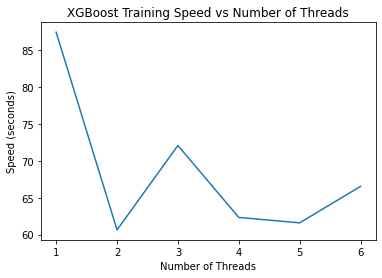

In [ ]:
data = read_csv('/content/sample_data/train.csv')
dataset = data.values
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
# evaluate the effect of the number of threads
results = []
num_threads = [1, 2, 3, 4,5,6]
for n in num_threads:
    t1 = time.perf_counter()
    model = XGBClassifier(nthread=n)
    model.fit(X, label_encoded_y)
    t2 = time.perf_counter()
    elapsed = t2 - t1
    print(n, elapsed)
    results.append(elapsed)
# plot results
pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()

Nhận xét Có thể thấy xu hướng có vẻ giảm của thời gian train model khi số lượng threads tăng lên